# Jupyter notebook tutourial part 3

This notebook is about...

# Restoring data from previous sessions

Read the data we have used before


### The NASA dataset, obtained from NASA

aaa

In [ ]:
# keep stuff inside the notebook, for UI
#%pylab inline
 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

df= pd.read_table('../bearing_IMS/1st_test/2003.10.22.12.06.24',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"])


#df2 is the end of data, dataset
df2= pd.read_table('../bearing_IMS/1st_test/2003.11.14.15.22.17',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"])
                         #,usecols = ["Bearing 3.1"])

## Plotting data using matplotlib 


For visualization, we will plot the raw data

(-0.6, 0.3)

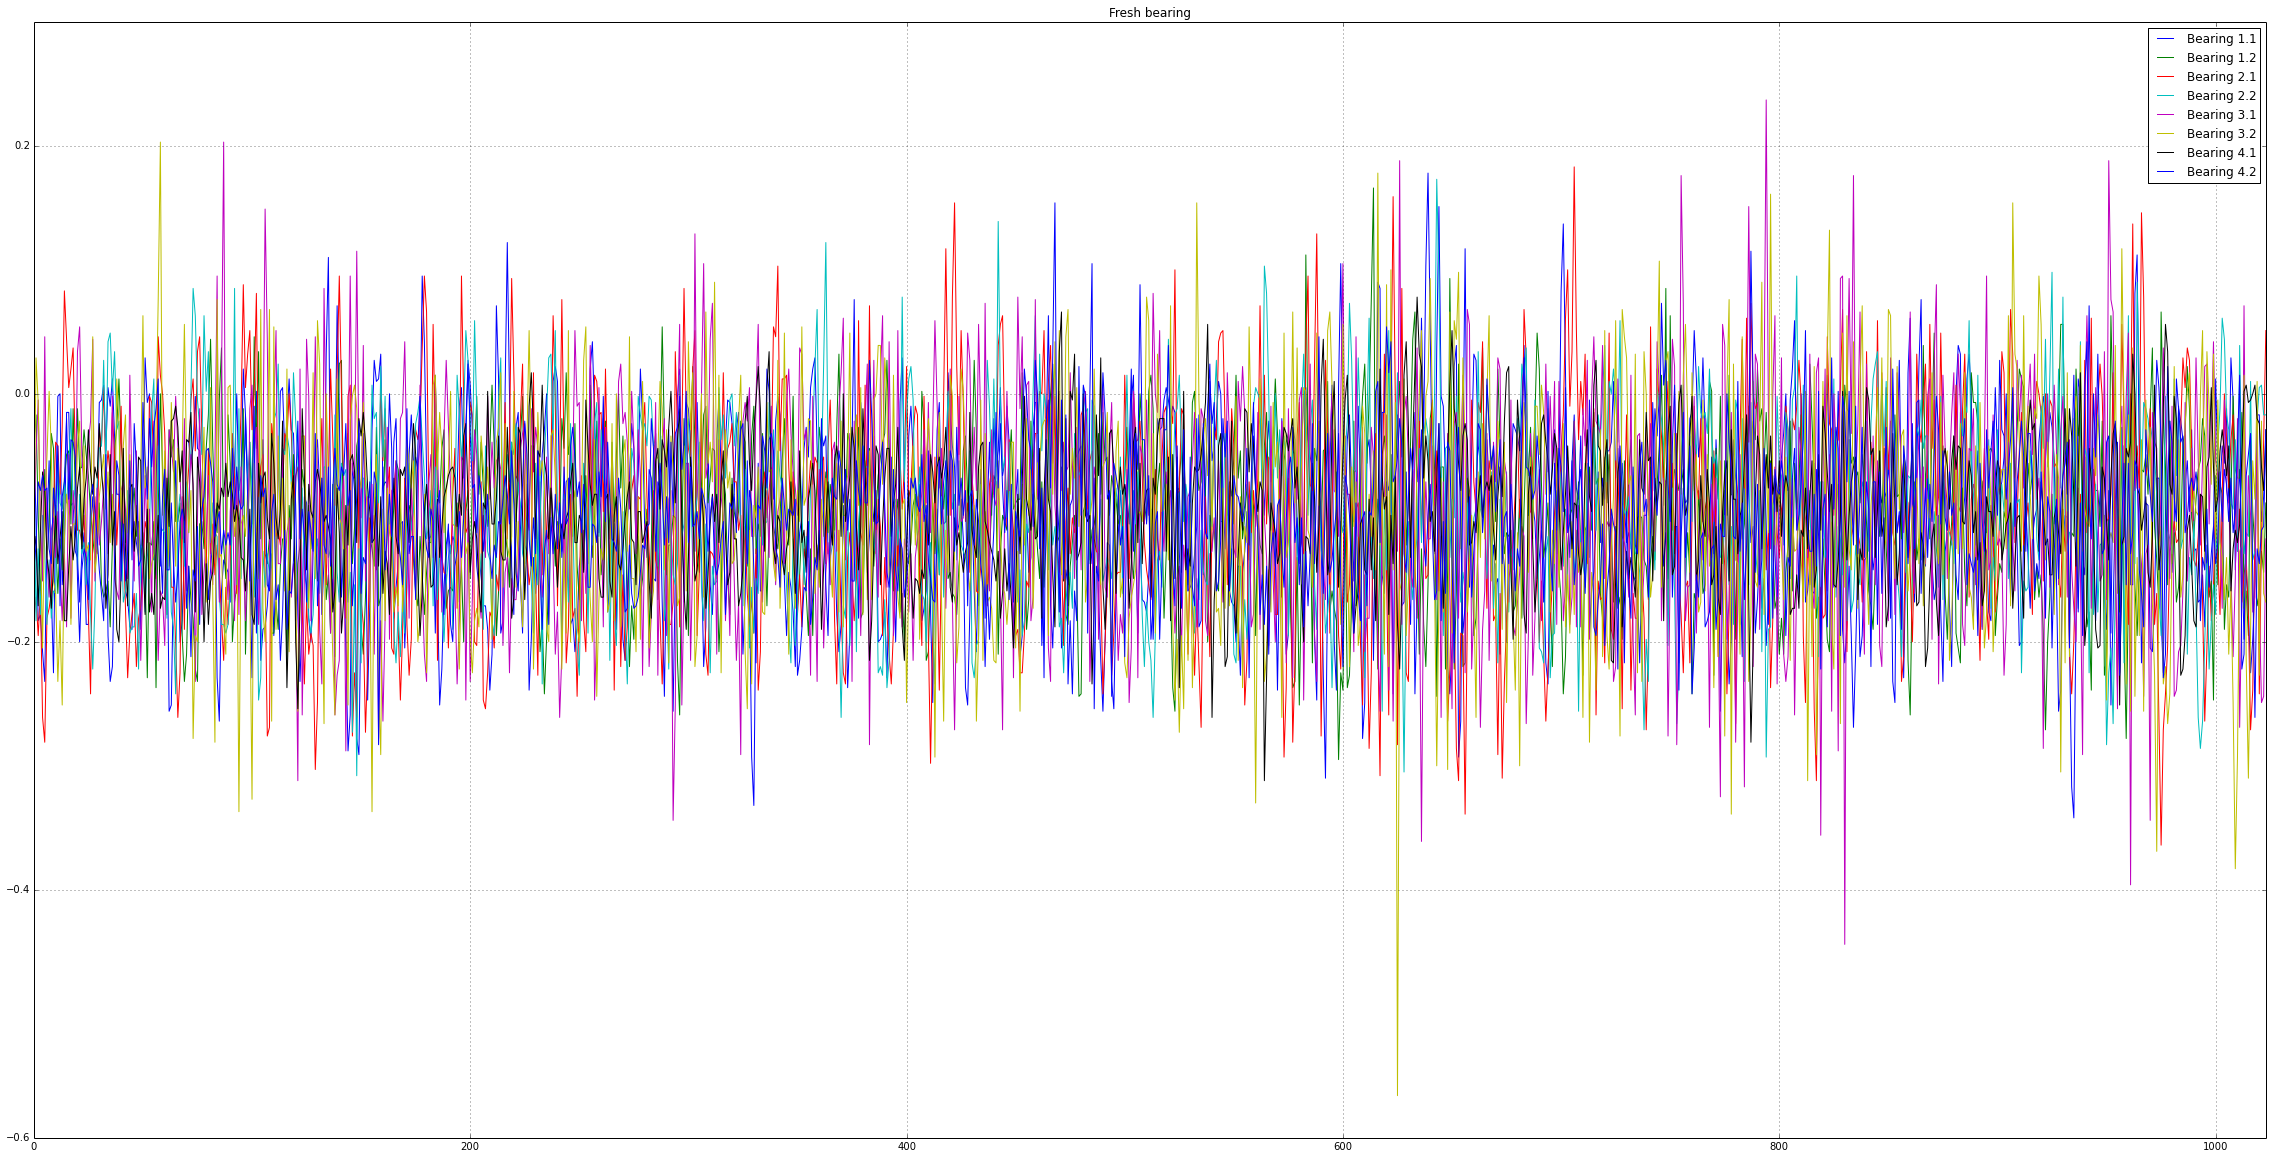

In [2]:
df[0:1024].plot(figsize=(40, 20))
plt.title("Fresh bearing")
plt.ylim(-0.6,0.3)

Above shows 8 channles of RAW data, from a fresh bearing

(-0.6, 0.3)

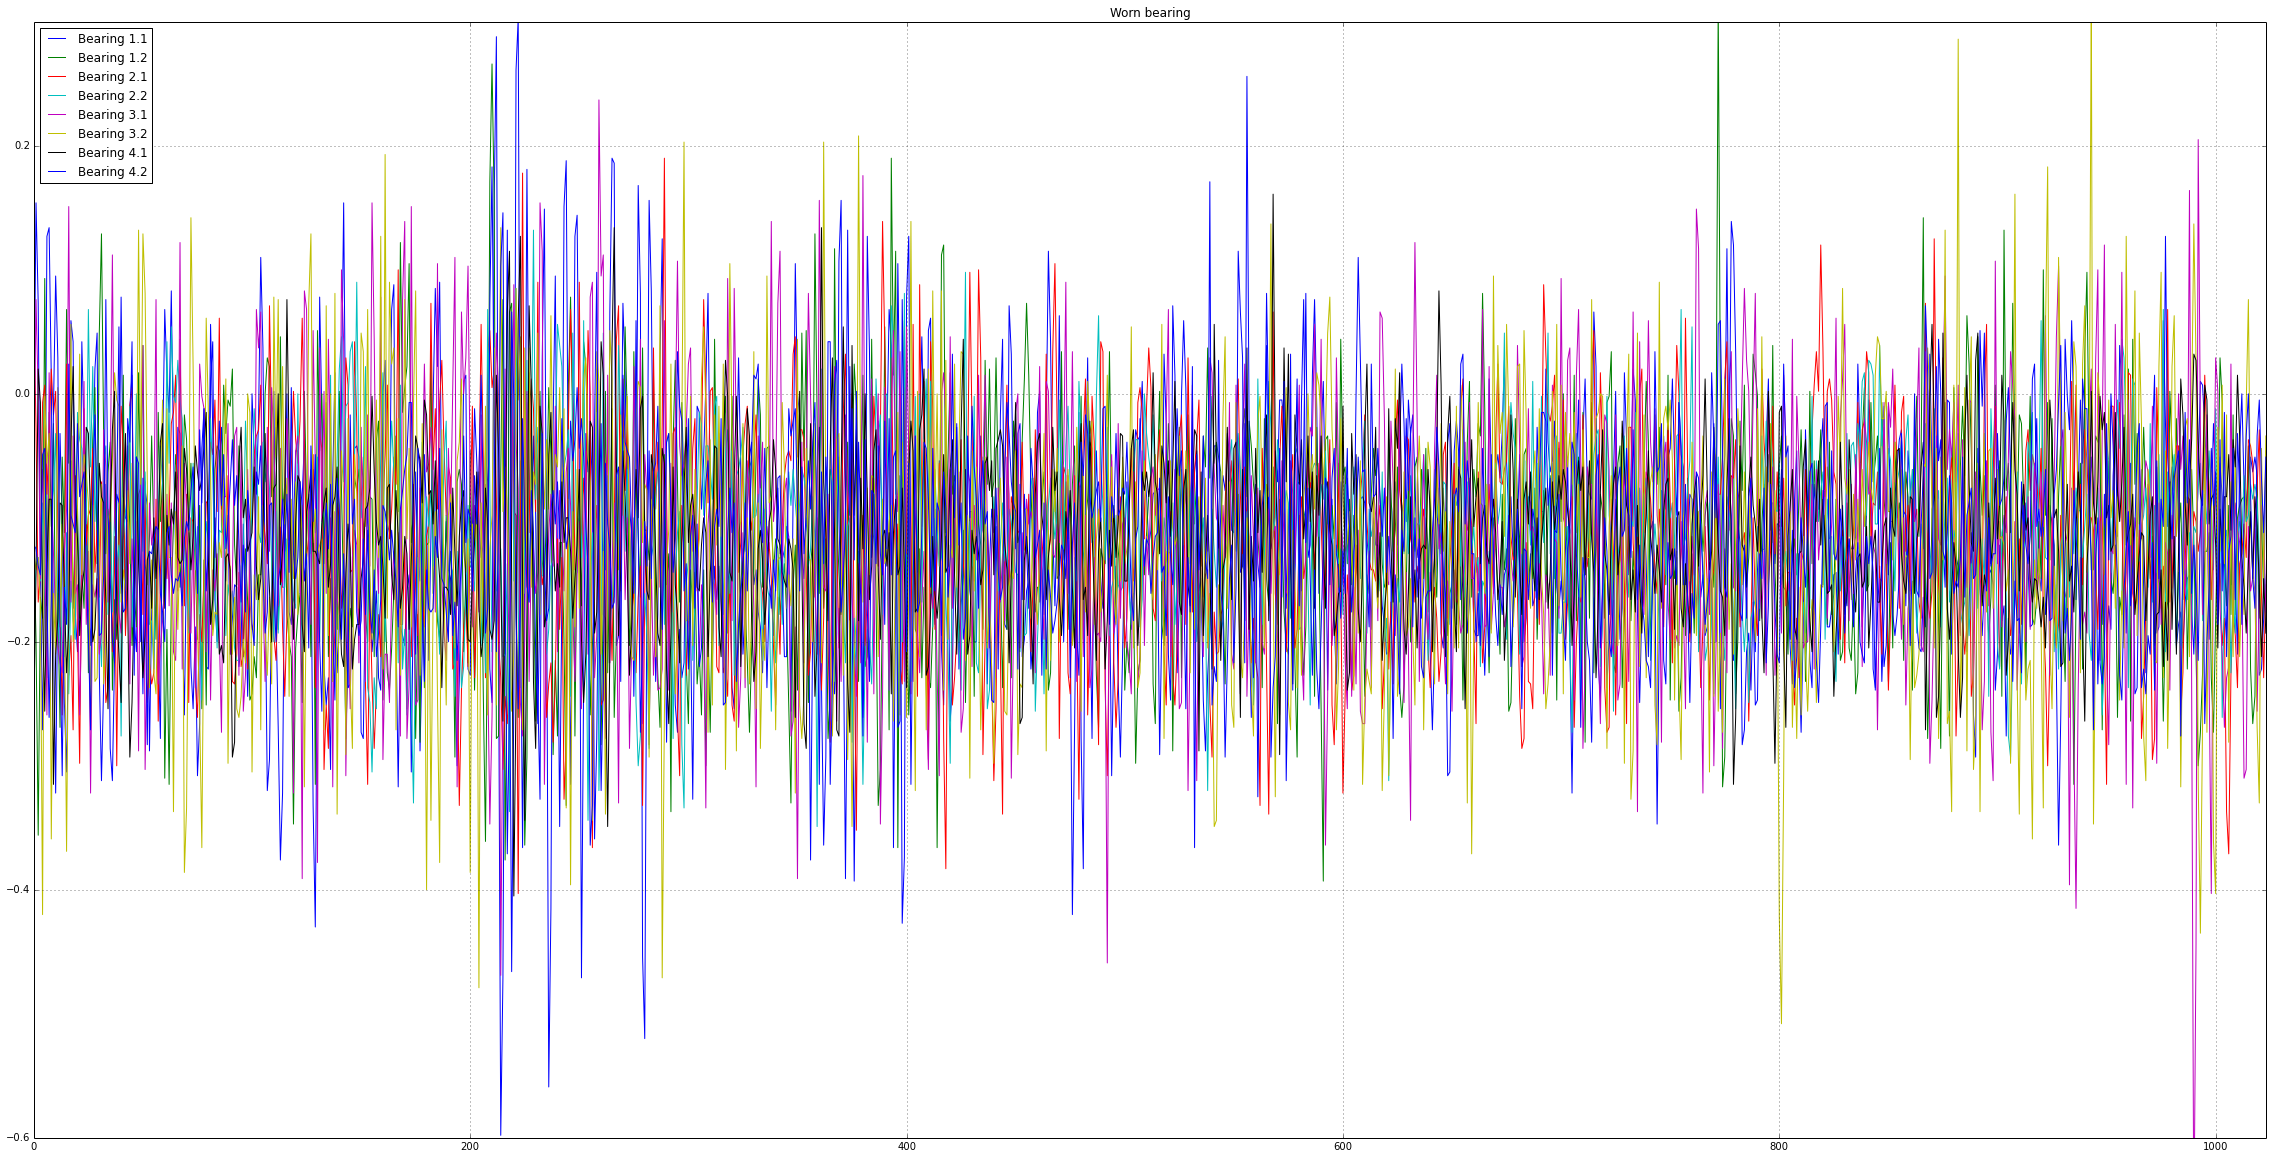

In [3]:
df2[0:1024].plot(figsize=(40, 20))
plt.title("Worn bearing")
plt.ylim(-0.6,0.3)

## Analysis tools

FFT

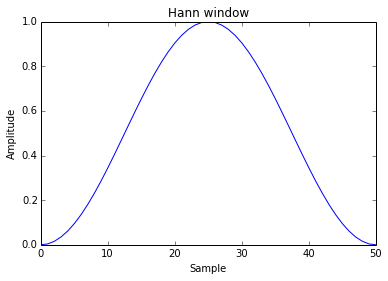

In [28]:
from numpy.fft import fft, fftshift
window = np.hanning(51)
plt.plot(window)

plt.title("Hann window")

plt.ylabel("Amplitude")

plt.xlabel("Sample")

plt.show()

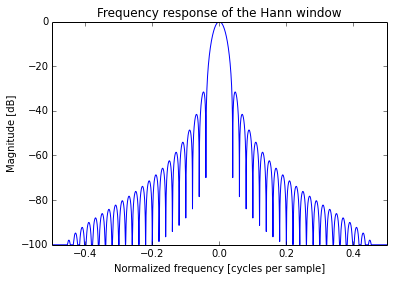

In [42]:
plt.figure()

A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)

plt.title("Frequency response of the Hann window")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [cycles per sample]")

plt.axis('tight')

plt.show()

In [48]:
df.size

163840

In [50]:
#keep plot inside the notebook
%matplotlib inline   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 10)

samplesB1_start = pd.read_table('../bearing_IMS/1st_test/2003.10.22.12.06.24',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 3.1"])
#                         usecols = ["Bearing 3.1", "Bearing 3.2"])


samplesB1_end = pd.read_table('../bearing_IMS/1st_test/2003.11.14.15.22.17',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
                         usecols = ["Bearing 3.1"])
#                         usecols = ["Bearing 3.1", "Bearing 3.2"])

# Number of samplepoints
N = samplesB1_start.size
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N, N)

#read samples from the bearings
y1 = samplesB1_start
y2 = samplesB1_end



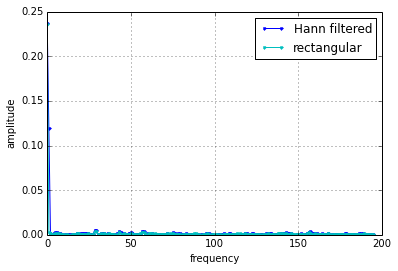

In [47]:

samplingFrequency = 20000

nfft = df.size/8

eta = df2['Bearing 1.1']
etaHann=np.hanning(nfft)*eta
#etaHann = np.hanning(2048)*eta
EtaSpectrum=abs(fft(eta))
EtaSpectrum=EtaSpectrum*2/nfft # convert to amplitude
EtaSpectrumHann=abs(fft(etaHann))
EtaSpectrumHann=EtaSpectrumHann*2*2/nfft # also correct for Hann filter
frequencies=np.linspace(0,samplingFrequency,nfft)
plt.plot(frequencies[0:200],EtaSpectrumHann[0:200],'b.-',label='Hann filtered')
plt.plot(frequencies[0:200],EtaSpectrum[0:200],'c.-',label='rectangular')
#plt.xlim(-0.01,2)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.grid()
plt.legend(loc=0)
plt.show()

In [24]:
import stft
import pylab
import scipy

We can start out by counting the instances of each single sample value, on one channel sorted by the maximum occurences

In [17]:
specgram = stft.spectrogram(df)
output = stft.ispectrogram(specgram)


X = stft.spectrogram(df)


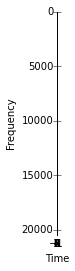

In [22]:
# X = stft(x, fs, framesz, hop)

# Plot the magnitude spectrogram.
pylab.figure()
#pylab.imshow(scipy.absolute(X.T), origin='lower', aspect='auto',
#                 interpolation='nearest')
pylab.imshow(output)

pylab.xlabel('Time')
pylab.ylabel('Frequency')
pylab.show()


In [26]:
f0 = 440         # Compute the STFT of a 440 Hz sinusoid
fs = 8000        # sampled at 8 kHz
T = 5            # lasting 5 seconds
framesz = 0.050  # with a frame size of 50 milliseconds
hop = 0.025      # and hop size of 25 milliseconds.

    # Create test signal and STFT.
t = scipy.linspace(0, T, T*fs, endpoint=False)
x = scipy.sin(2*scipy.pi*f0*t)
X = stft(x, fs, framesz, hop)

    # Plot the magnitude spectrogram.
pylab.figure()
pylab.imshow(scipy.absolute(X.T), origin='lower', aspect='auto',
                 interpolation='nearest')
pylab.xlabel('Time')
pylab.ylabel('Frequency')
pylab.show()

    # Compute the ISTFT.
xhat = istft(X, fs, T, hop)

    # Plot the input and output signals over 0.1 seconds.
T1 = int(0.1*fs)

pylab.figure()
pylab.plot(t[:T1], x[:T1], t[:T1], xhat[:T1])
pylab.xlabel('Time (seconds)')

pylab.figure()
pylab.plot(t[-T1:], x[-T1:], t[-T1:], xhat[-T1:])
pylab.xlabel('Time (seconds)')

TypeError: 'module' object is not callable

Now we can look at the largest ampltiude values obtained, perhaps this can be informative, when comparing smaples over time

Start with the data from the **fresh bearing**

In [ ]:
df['Bearing 1.1'].nlargest(10) 


In [ ]:
df['Bearing 1.1'].nsmallest(10) 

Then use the data from the **damaged bearing**

In [ ]:
df2['Bearing 1.1'].nlargest(10) 


In [ ]:
df2['Bearing 1.1'].nsmallest(10) 

We can see the damaged bearing seems to have more high negative samples values, we need to find a more informal way to display theese

### Distribution analysis



Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of **f6** assuming it is somkind descriptive data, could be income, using the following commands:
    df['f6'].hist(bins=50)

In [ ]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 10)

plt.subplot(3,1,1)
df['Bearing 1.1'].hist(bins=100)
plt.title("Fresh bearing")
plt.xlim(-0.4,0.4)
plt.ylim(0,1400)

plt.subplot(3,1,2)
df2['Bearing 1.1'].hist(bins=100)
plt.title("Worn bearing")
plt.xlim(-0.4,0.4)
plt.ylim(0,1400)

Now lets zoom in in the range **-0.3 .. -0.7**

In [ ]:
plt.subplot(3,1,1)
df['Bearing 1.1'].hist(bins=100)
plt.title("Fresh bearing")
plt.xlim(-0.7,-0.3)
plt.ylim(0,200)

plt.subplot(3,1,2)
df2['Bearing 1.1'].hist(bins=100)
plt.title("Worn bearing")
plt.xlim(-0.7,-0.3)
plt.ylim(0,200)

We can look more at the distribution, using a boxplot

In [ ]:

plt.subplot('{0}{1}{2}'.format(2,1,1))
plt.boxplot(df['Bearing 1.1'],vert=0)
plt.xlim(-0.6,0.6)
plt.title("Fresh bearing")

plt.subplot('{0}{1}{2}'.format(2,1,2))
plt.boxplot(df2['Bearing 1.1'],vert=0)
plt.xlim(-0.6,0.6)
plt.title("Worn bearing")

plt.show()

In [ ]:
#df.describe(include='all')
df.describe()[['f6','f7']]